In [4]:
#it converts xyz coordinates into array of coordinates. It includes all the coordinates that is present in the xyz file. 
#it skips first two line of xyz as it does not coordinate information
#example usage: array = xyz_to_array_of_coordinates(""DMDBT_cn_500_1p5.xyz")
def xyz_to_array_of_coordinates(file_name):
    import numpy as np
    
    f = open(file_name,'r')
    
    g = open("corrected-coord.txt", "w")
    
    for line in f:
        if line.strip():
            g.write("\t".join(line.split()[1:]) + "\n")
    f.close()

    fl_coords = []
    with open("corrected-coord.txt", "r") as g:
        lines = g.readlines()
        d_lines = lines[1:]

        for i in d_lines:
        
            coords = [np.array(i.replace("'", "").rstrip('\n').replace('\t', ' ').split(' '))]
            for arr in coords:
                l = arr.astype(float)
                fl_coords.append(l)

        arr = np.asarray(fl_coords)
    return(arr)


In [1]:
def get_diag_from_distance_matrix(mat,max_dimension_in_it,max_edge_length_in_it,min_persistence_in_it):
    '''
    Input:
    
    mat = a square distance matrix 
    max_dimension_in_it = max dimension of simplex tree
    max_edge_length_in_it = maximum filtration value
    min_persistence_in_it = minimum persistence value to print for simplicial complexes
    
    Returns:
    diag = (n x 2 numpy array) – of persistence diagram; 
    triangles_0 = 2-simplex
    '''
    import gudhi as gd
    
    skeleton_0 = gd.RipsComplex(distance_matrix=mat, max_edge_length=max_edge_length_in_it)
    Rips_simplex_tree_0 = skeleton_0.create_simplex_tree(max_dimension=max_dimension_in_it)
    Rips_simplex_tree_0.dimension()
    diag = Rips_simplex_tree_0.persistence(min_persistence=min_persistence_in_it)
    Rips_simplex_tree_0 = skeleton_0.create_simplex_tree(max_dimension=3)
    triangles_0 = np.array([s[0] for s in Rips_simplex_tree_0.get_skeleton(2) if len(s[0])==3])
    
    return(diag,triangles_0)

<IPython.core.display.Javascript object>


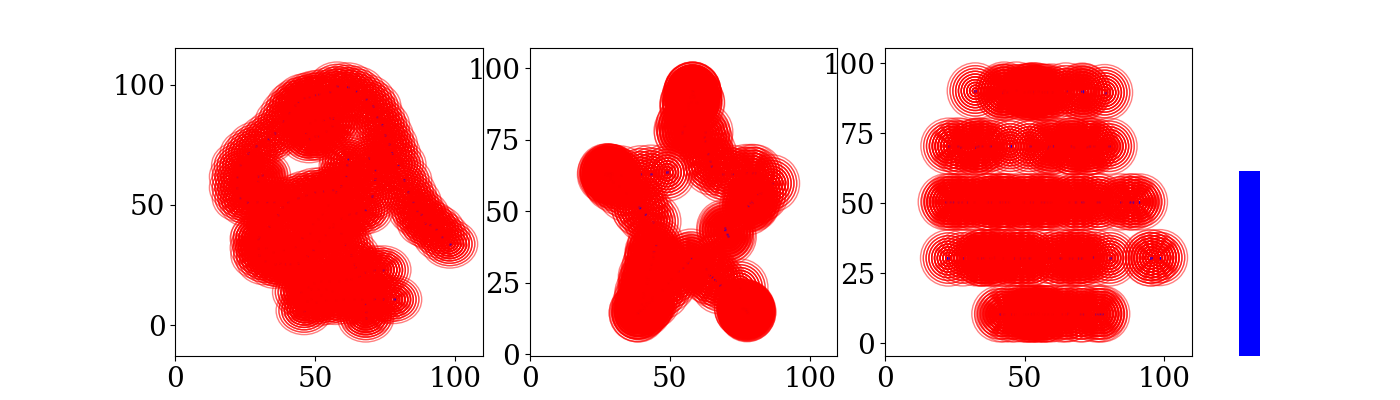

In [1]:
##This is for the animation 
##Here I have used dataset from this link: 
#https://www.autodesk.com/research/publications/same-stats-different-graphs
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import gudhi as gd
from scipy.spatial.distance import pdist,squareform
import matplotlib
from matplotlib import font_manager
%matplotlib notebook
from matplotlib.animation import FuncAnimation, writers


matplotlib.rcParams.update({'font.size': 20})
matplotlib.rcParams['font.family'] = ['DejaVu Serif']
font = font_manager.FontProperties(family='DejaVu Serif',
                                   weight='normal',
                                   style='normal', size=20)


#below two lines for random dataset
#np.random.seed(1020)
#coordinates = np.random.randint(0, 100, size=(15, 2))


fig, axes = plt.subplots(ncols=4,nrows=1,figsize=(14,4),sharey=False,gridspec_kw={'width_ratios': [3,3,3, 0.2]})

axes[3].set_ylim((0,15))
axes[3].set_xlim((0,0.3))
selected_dataset = ['dino','star','h_lines']
dataset = pd.read_csv('DatasaurusDozen.tsv',sep='\t', header=0)

def animation_function(i):
    for ndx,d in enumerate(selected_dataset):
        df_dino = dataset.loc[dataset['dataset'] == d]
        axes[ndx].scatter(df_dino['x'],df_dino['y'],color='blue',s=0.5)
        axes[ndx].set_xlim((0,110))
        df=df_dino
        palette = ['blue']

        for d in np.array(np.arange(0,i,1)):

            for mdx,each in enumerate(zip(df['x'],df['y'])):

                c= plt.Circle((each[0],each[1]),d,edgecolor='red',facecolor="None",alpha=0.5,linewidth=1)
                axes[ndx].add_patch(c)
                axes[3].bar(["Diameter"],[i],color = palette)
           

animation = FuncAnimation(fig, animation_function,interval = 10)



Deprecated parameter. It has been replaced by max_intervals


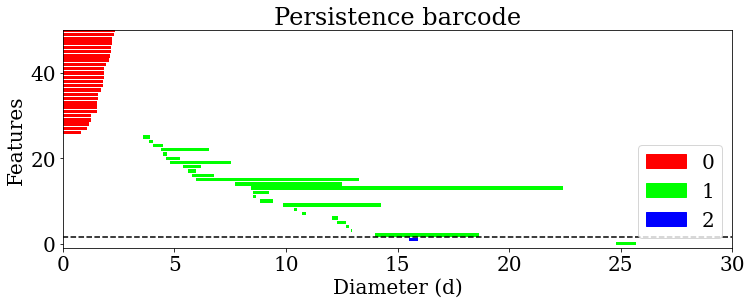

In [23]:
# plotting barcode using GUDHI
import matplotlib.patches as mpatches
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager
import pandas as pd
from scipy.spatial.distance import pdist,squareform
import numpy as np
import gudhi as gd

matplotlib.rcParams.update({'font.size': 20})
matplotlib.rcParams['font.family'] = ['DejaVu Serif']
font = font_manager.FontProperties(family='DejaVu Serif',
                                   weight='normal',
                                   style='normal', size=20)


dataset = pd.read_csv('DatasaurusDozen.tsv',sep='\t', header=0)
dataset = dataset.loc[dataset['dataset'] == 'dino']
coordinates = dataset[["x", "y"]].to_numpy()
#provide coordinates of point clouds 
mat = squareform(pdist(coordinates))

diag,triangles_0 = get_diag_from_distance_matrix(mat,3,30,0)

fig, axes = plt.subplots(ncols=1,nrows=1,figsize=(12,4),sharey=True)

gd.persistence_graphical_tools.plot_persistence_barcode(diag,alpha=1,legend=True)
axes.set_ylim(-1,50)
axes.set_xlim(0,30)
#axes.vlines(23.4,-1,18,linestyle='dashed',colors='black')
#axes.vlines(35.7,-1,18,linestyle='dashed',colors='black')
axes.hlines(1.5,-5,60,linestyle='dashed',colors='black')
axes.set_xlabel('Diameter (d)')
axes.set_ylabel('Features')

#axes.legend(handles=[mpatches.Patch(color=matplotlib.cm.Set1.colors[dim],label=str(r'$\beta$')+str(dim)) for dim in [0,1]])
plt.savefig('Barcode_representation.pdf',bbox_inches='tight',dpi=600)


In [34]:
gd.persistence_graphical_tools.plot_persistence_barcode

Deprecated parameter. It has been replaced by max_intervals


<module 'matplotlib.pyplot' from '/home/biswajit/anaconda3/envs/priyo/lib/python3.7/site-packages/matplotlib/pyplot.py'>

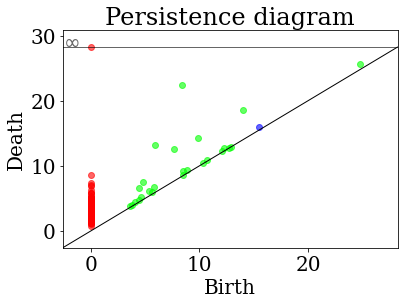

In [24]:
#for persistence diagram

gd.plot_persistence_diagram(diag)


number of 2-simplex: 3 33 99 273


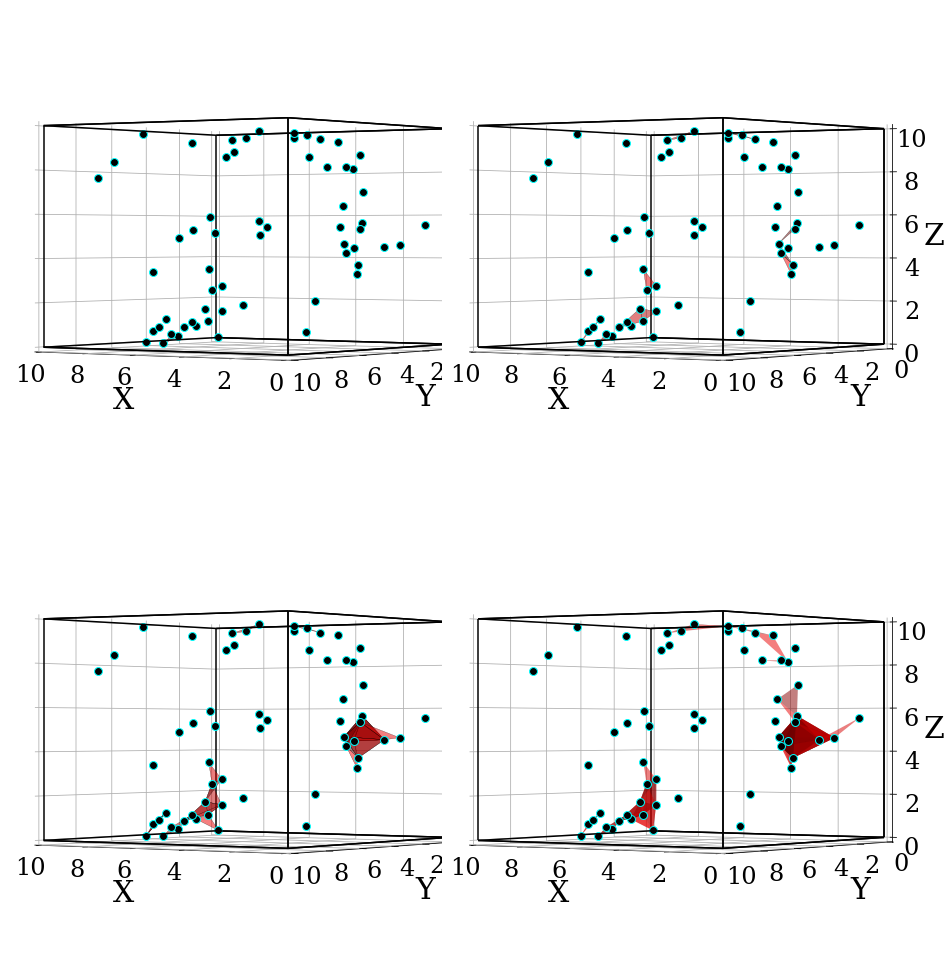

In [26]:
import MDAnalysis as mda
import os
from scipy.spatial.distance import squareform, pdist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from matplotlib.font_manager import FontProperties
import matplotlib
from matplotlib import font_manager

matplotlib.rcParams.update({'font.size': 20})
matplotlib.rcParams['font.family'] = ['DejaVu Serif']
font = font_manager.FontProperties(family='DejaVu Serif',
                                   weight='normal',
                                   style='normal', size=20)

#convert final output values in decimal points
np.set_printoptions(suppress=True)

#os.chdir('F:\wsu_phase\software-and-manual\dodecane_todga_packmol_files\GM\Markov_Paper\INTRA-TIAGG\C5_60sepxtc\FIT_XTC_POLARCORE_FITTED_WHOLEDGA\WMETA')

#use gro file generated from gromacs
u = mda.Universe('nvt-nopbc-c5.gro')

#extract coordinate information; here I have considered O1 atom of each molecule present in simulation box

O1_positions = u.select_atoms('name O1').positions

#generate square matrix
mat = squareform(pdist(O1_positions, 'euclidean'))

def visualize_triag_vr_from_distance_matrix_with_scatter(fig_name, mat,d_line,max_edge_length,min_persistence_in_it):
    '''
    Input:
    fig_name = name of the output figure.
    mat = distance matrix, 
    d_line = numpy array of coordinates, 
    max_edge_length = provide an array of four filtration values at which you like to visulatize the 2-simplexes
    e.g. [10,15,20,25], maximum four item in max edge length is allowed.
    
    Ruturn:
    fig object
    '''
    import numpy as np
    import gudhi as gd
    import matplotlib.pyplot as plt
    from math import sqrt
    import numpy as np
    import gudhi
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt
    from matplotlib.widgets import Slider
    
    
    skeleton_0 = gd.RipsComplex(distance_matrix=mat, max_edge_length=max_edge_length[0])
    Rips_simplex_tree_0 = skeleton_0.create_simplex_tree(max_dimension=3)

    skeleton_1 = gd.RipsComplex(distance_matrix=mat, max_edge_length=max_edge_length[1])
    Rips_simplex_tree_1 = skeleton_1.create_simplex_tree(max_dimension=3)

    skeleton_2 = gd.RipsComplex(distance_matrix=mat, max_edge_length=max_edge_length[2])
    Rips_simplex_tree_2 = skeleton_2.create_simplex_tree(max_dimension=3)

    skeleton_3 = gd.RipsComplex(distance_matrix=mat, max_edge_length=max_edge_length[3])
    Rips_simplex_tree_3 = skeleton_3.create_simplex_tree(max_dimension=3)


    triangles_0 = np.array([s[0] for s in Rips_simplex_tree_0.get_skeleton(2) if len(s[0])==3])
    triangles_1 = np.array([s[0] for s in Rips_simplex_tree_1.get_skeleton(2) if len(s[0])==3])
    triangles_2 = np.array([s[0] for s in Rips_simplex_tree_2.get_skeleton(2) if len(s[0])==3])
    triangles_3 = np.array([s[0] for s in Rips_simplex_tree_3.get_skeleton(2) if len(s[0])==3])
    print('number of 2-simplex:',triangles_0.size,triangles_1.size,triangles_2.size,triangles_3.size,)
    d_line = np.array(d_line)/10

    # Visualization with matplotlib
    fig = plt.figure(figsize=(16,14))

    #fig,((ax0,ax1),(ax2,ax3)) = plt.subplots(ncols=2, nrows=2,figsize=(16, 14))

    r = [0,10]
    X, Y = np.meshgrid(r, r)
    one = [[0, 0],[0, 0]]
    one = np.array(one)
    hundred = [[10, 10],[10, 10]]
    hundred = np.array(hundred)

    #ax0
    #ax0 = fig.gca(projection='3d') 
    ax0 = fig.add_subplot(221, projection='3d')
    ax0.scatter(d_line[:,0], d_line[:,1], d_line[:,2], s=np.pi*1**2*20, alpha=1, marker='o', 
                edgecolors = 'cyan',depthshade=False,facecolors='black')
    #ax0.plot(triangles_0[:,0],triangles_0[:,1])
    if triangles_0.size > 0:
        surf0 = ax0.plot_trisurf(d_line[:,0], d_line[:,1], d_line[:,2], triangles=triangles_0,antialiased=True, 
                                 color='red',edgecolor='black',alpha=0.5, linewidth=0.2)
    ax0.plot_wireframe(X,Y,hundred, alpha=1, color='black')
    ax0.plot_wireframe(X,hundred,Y, alpha=1, color='black')
    ax0.plot_wireframe(X,Y,-one, alpha=1, color='black')
    ax0.plot_wireframe(X,-one,Y, alpha=1, color='black')
    ax0.plot_wireframe(-one,X,Y, alpha=1, color='black')
    ax0.set_xlim(0, 10)
    ax0.set_ylim(0, 10)
    ax0.set_zlim(0, 10)
    ax0.xaxis.pane.fill = False
    ax0.yaxis.pane.fill = False
    ax0.zaxis.pane.fill = False
    ax0.xaxis.pane.set_edgecolor('w')
    ax0.yaxis.pane.set_edgecolor('w')
    ax0.zaxis.pane.set_edgecolor('w')
    ax0.tick_params(axis='both', which='major', labelsize=17)
    #ax0.grid(False)
    #ax0.set_axis_off()
    ax0.view_init(0, 125)

    #ax1
    #ax1 = fig.gca(projection='3d') 
    ax1 = fig.add_subplot(222, projection='3d')
    ax1.scatter(d_line[:,0], d_line[:,1], d_line[:,2], s=np.pi*1**2*20, alpha=1, marker='o', 
                edgecolors = 'cyan',depthshade=False,facecolors='black')
    if triangles_1.size > 0:
        surf1 = ax1.plot_trisurf(d_line[:,0], d_line[:,1], d_line[:,2], triangles=triangles_1, 
                                 antialiased=True, color='red',edgecolor='black',alpha=0.5, linewidth=0.2)
    ax1.plot_wireframe(X,Y,hundred, alpha=1, color='black')
    ax1.plot_wireframe(X,hundred,Y, alpha=1, color='black')
    ax1.plot_wireframe(X,Y,-one, alpha=1, color='black')
    ax1.plot_wireframe(X,-one,Y, alpha=1, color='black')
    ax1.plot_wireframe(-one,X,Y, alpha=1, color='black')
    ax1.set_xlim(0, 10)
    ax1.set_ylim(0, 10)
    ax1.set_zlim(0, 10)
    ax1.xaxis.pane.fill = False
    ax1.yaxis.pane.fill = False
    ax1.zaxis.pane.fill = False
    ax1.xaxis.pane.set_edgecolor('w')
    ax1.yaxis.pane.set_edgecolor('w')
    ax1.zaxis.pane.set_edgecolor('w')
    ax1.tick_params(axis='both', which='major', labelsize=17)
    #ax1.grid(False)
    #ax1.set_axis_off()
    ax1.view_init(0, 125)
    
    #ax2
    #ax2 = fig.gca(projection='3d') 
    ax2 = fig.add_subplot(223, projection='3d')
    ax2.scatter(d_line[:,0], d_line[:,1], d_line[:,2], s=np.pi*1**2*20, alpha=1, marker='o', 
                edgecolors = 'cyan',depthshade=False,facecolors='black')
    
    
    if triangles_2.size > 0:
        surf2 = ax2.plot_trisurf(d_line[:,0], d_line[:,1], d_line[:,2], triangles=triangles_2, 
                                 antialiased=True, color='red',edgecolor='black',alpha=0.5, linewidth=0.2)
    ax2.plot_wireframe(X,Y,hundred, alpha=1, color='black')
    ax2.plot_wireframe(X,hundred,Y, alpha=1, color='black')
    ax2.plot_wireframe(X,Y,-one, alpha=1, color='black')
    ax2.plot_wireframe(X,-one,Y, alpha=1, color='black')
    ax2.plot_wireframe(-one,X,Y, alpha=1, color='black')
    ax2.set_xlim(0, 10)
    ax2.set_ylim(0, 10)
    ax2.set_zlim(0, 10)
    ax2.xaxis.pane.fill = False
    ax2.yaxis.pane.fill = False
    ax2.zaxis.pane.fill = False
    ax2.xaxis.pane.set_edgecolor('w')
    ax2.yaxis.pane.set_edgecolor('w')
    ax2.zaxis.pane.set_edgecolor('w')
    ax2.tick_params(axis='both', which='major', labelsize=17)
    #ax2.grid(False)
    #ax2.set_axis_off()
    ax2.view_init(0, 125)
    

    #ax3
    #ax3 = fig.gca(projection='3d') 
    ax3 = fig.add_subplot(224, projection='3d')
    ax3.scatter(d_line[:,0], d_line[:,1], d_line[:,2], s=np.pi*1**2*20, marker='o',alpha=1, 
                edgecolors = 'cyan',depthshade=False,facecolors='black')
    #ax3.plot(triangles_3[:,0],triangles_3[:,1])
    if triangles_3.size > 0:
        surf3 = ax3.plot_trisurf(d_line[:,0], d_line[:,1], d_line[:,2], triangles=triangles_3, antialiased=True, color='r',edgecolor='black',alpha=0.5, linewidth=0.01)
    ax3.plot_wireframe(X,Y,hundred, alpha=1, color='black')
    ax3.plot_wireframe(X,hundred,Y, alpha=1, color='black')
    ax3.plot_wireframe(X,Y,-one, alpha=1, color='black')
    ax3.plot_wireframe(X,-one,Y, alpha=1, color='black')
    ax3.plot_wireframe(-one,X,Y, alpha=1, color='black')
    ax3.set_xlim(0, 10)
    ax3.set_ylim(0, 10)
    ax3.set_zlim(0, 10)
    ax3.xaxis.pane.fill = False
    ax3.yaxis.pane.fill = False
    ax3.zaxis.pane.fill = False
    ax3.xaxis.pane.set_edgecolor('w')
    ax3.yaxis.pane.set_edgecolor('w')
    ax3.zaxis.pane.set_edgecolor('w')
    ax3.tick_params(axis='both', which='major', labelsize=17)
    #ax3.grid(False)
    ax3.view_init(0, 125) 
    #ax3.set_axis_off()
    
    for each in [ax0,ax1,ax2,ax3]:
        each.xaxis.labelpad=22
        each.yaxis.labelpad=22
        each.tick_params(labelsize=24)
        each.set_xlabel('X', fontsize=30, rotation = 0)
        each.set_ylabel('Y', fontsize=30, rotation = 0)
        each.set_zlabel('Z', fontsize=30, rotation = 0)
        

    plt.subplots_adjust(bottom=-1, wspace=-1, hspace=-5)


    plt.tight_layout()
    fig = plt.savefig(fig_name + ".png",bbox_inches='tight',dpi=600)
    
    return(fig)

visualize_triag_vr_from_distance_matrix_with_scatter('c5-o1',mat,O1_positions,[8,12,16,20],0)

In [27]:
def persistence_density_plot_from_diag(fig_name,diag,dimension_in_it,start_x_axis_in_plot,end_x_axis_in_plot,
                                       start_y_axis_in_plot,end_y_axis_in_plot,vmax):
    '''
    #usage: fig, xi, yi, zi = persistence_density_plot_from_diag('pdensity',diag,1,7,30,7,30)
    #remember this zi is need to be reshaped to use for any other purposes: e.g. zi.reshape(xi.shape)
    Input: 
    fig_name = name of the output figure.
    diag = (n x 2 numpy array) – of persistence diagram; for this use get_diag_from_distance_matrix function
    mat = distance matrix,
    
    '''
    
    import numpy as np; np.random.seed(0)
    import matplotlib.pyplot as plt
    import scipy.stats
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    from scipy.stats import kde
    from matplotlib import rc

    
    life = []
    for dim, time in diag:
        if dim == dimension_in_it and time[1] != np.inf:
            life.append([time[0], time[1]])
    life = np.array(life)

    birth = life[:, 0]
    death = life[:, 1]
    
    k = kde.gaussian_kde([birth,death],bw_method=None)
    nbins = 301
    xi, yi = np.mgrid[start_x_axis_in_plot : end_x_axis_in_plot : nbins * 1j,start_y_axis_in_plot : end_y_axis_in_plot : nbins * 1j,]

    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    
    fig, axes = plt.subplots(1, 1)
    # Make the plot
    vmin = 0
    if vmax == None:
        img = axes.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.hot_r, vmin = 0, vmax = max(zi))
    else:
        img = axes.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.hot_r, vmin = 0, vmax = vmax)
        
    axes.add_patch(mpatches.Polygon([[start_x_axis_in_plot, start_y_axis_in_plot], [end_x_axis_in_plot, start_y_axis_in_plot], [end_x_axis_in_plot,end_y_axis_in_plot]], fill=True, edgecolor='black',facecolor='white'))
    #for integer tick at y axis
    yint = np.arange(start_y_axis_in_plot, end_y_axis_in_plot+5,5)
    axes.set_yticks(yint)
    axes.set_xlabel("Birth", fontsize=14)
    axes.set_ylabel("Death", fontsize=14)
    plt.colorbar(img, ax=axes)
    fig = plt.savefig(fig_name + ".png",dpi=600)
    
    return(fig, xi,yi,zi)

In [28]:
def Boltzmann_peristent_entropy(diag, dimension):
    import numpy as np
    #scale value same unit as alpha with respect to filtration parameter
    etta = 1
    #means 1 KB*T
    alpha = 1
    #an integer, in sci reports, it has value 2.
    kappa = 2

    total = 0
    
    for dim, time in diag:
        if dim == dimension and time[1] != np.inf:
            birth_length = time[1]-time[0]
            betti_energy = alpha*((birth_length/etta)**kappa)
            e_boltz = np.exp(-(betti_energy/alpha))
            total += e_boltz
        
       
    
    BPE = 0
    for dim, time in diag:
        if dim == dimension and time[1] != np.inf:
            birth_length = time[1]-time[0]
            betti_energy = alpha*((birth_length/etta)**kappa)
            e_boltz = np.exp(-(betti_energy/alpha))
            p_i = (e_boltz/total)
            S = -p_i*(np.log(p_i))
            BPE += S
        
    return(BPE)